In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [6]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [15]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


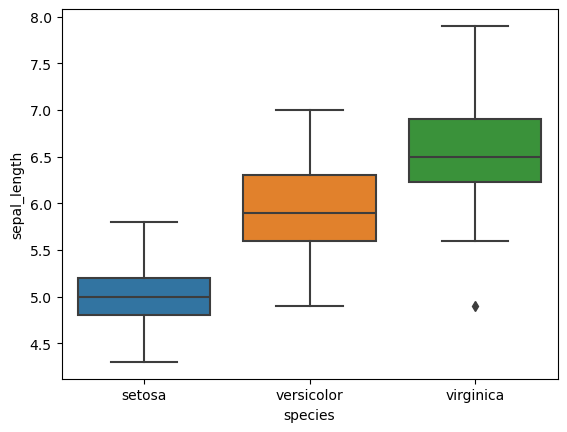

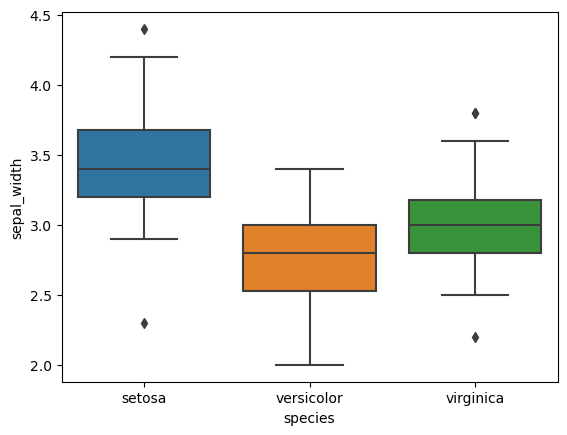

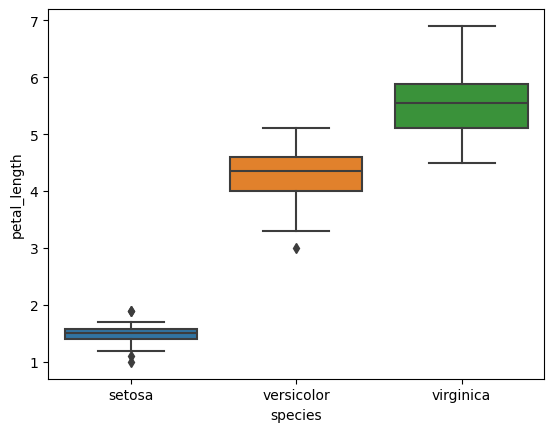

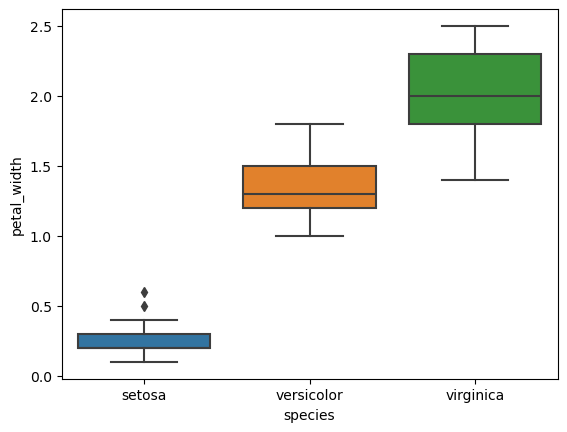

In [30]:
for i in ["sepal_length","sepal_width","petal_length","petal_width"]:
    sns.boxplot(x="species",y=i,data=iris)
    plt.show()

In [33]:
x=iris.iloc[:,0:3].values
sc=MinMaxScaler()
x=sc.fit_transform(x)
x

array([[0.22222222, 0.625     , 0.06779661],
       [0.16666667, 0.41666667, 0.06779661],
       [0.11111111, 0.5       , 0.05084746],
       [0.08333333, 0.45833333, 0.08474576],
       [0.19444444, 0.66666667, 0.06779661],
       [0.30555556, 0.79166667, 0.11864407],
       [0.08333333, 0.58333333, 0.06779661],
       [0.19444444, 0.58333333, 0.08474576],
       [0.02777778, 0.375     , 0.06779661],
       [0.16666667, 0.45833333, 0.08474576],
       [0.30555556, 0.70833333, 0.08474576],
       [0.13888889, 0.58333333, 0.10169492],
       [0.13888889, 0.41666667, 0.06779661],
       [0.        , 0.41666667, 0.01694915],
       [0.41666667, 0.83333333, 0.03389831],
       [0.38888889, 1.        , 0.08474576],
       [0.30555556, 0.79166667, 0.05084746],
       [0.22222222, 0.625     , 0.06779661],
       [0.38888889, 0.75      , 0.11864407],
       [0.22222222, 0.75      , 0.08474576],
       [0.30555556, 0.58333333, 0.11864407],
       [0.22222222, 0.70833333, 0.08474576],
       [0.

In [38]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\SRIVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SRIVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SRIVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SRIVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

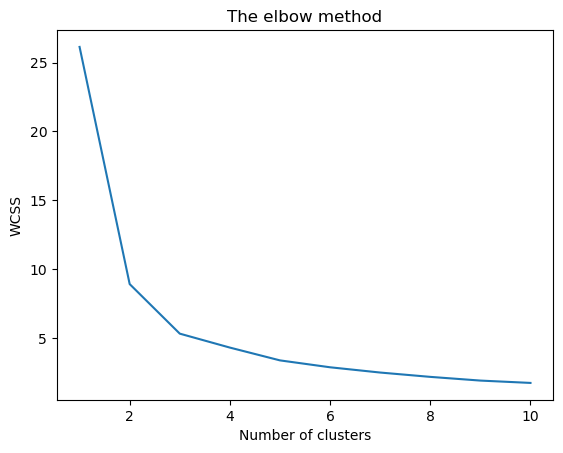

In [40]:
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [47]:
kmeans=KMeans(n_clusters=3)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

C:\Users\SRIVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SRIVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [46]:
kmeans.cluster_centers_

array([[0.41616162, 0.29090909, 0.57380586],
       [0.19611111, 0.595     , 0.07830508],
       [0.70246914, 0.45185185, 0.76986817]])

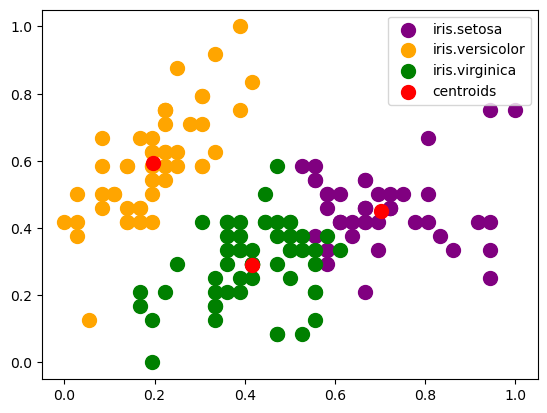

In [62]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='purple',label="iris.setosa")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='orange',label="iris.versicolor")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label="iris.virginica")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="red",label="centroids")
plt.legend()